If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [1]:
#!pip3 install scikit-learn==1.3.2

In [2]:
import sklearn
import numpy as np
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


## SVM

In [3]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

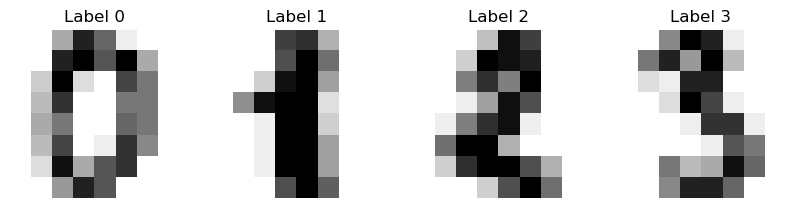

In [4]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [5]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

In [6]:
D_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  7., 16., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Exercise a 

Train an RBF kernel SVM with parameters gamma=0.0005, C=0.9. Use the SVC SVM model from sklearn to do so. Train the model on the D_train dataset (70-30 split) and test the model on the D_test dataset. What is the accuracy of the model on the test data?

In [7]:
from sklearn.svm import SVC

gamma = 0.0005
C= 0.9

# SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=gamma, C=C)

# Train model on training data
svm_model.fit(D_train, y_train)

# Predict the labels for the test data
y_pred = svm_model.predict(D_test)

# Evaluate the accuracy of the model
accuracy = svm_model.score(D_test, y_test)

accuracy

0.9555555555555556

### Exercise e
Use the sklearn function GridSearchCV to determine the best combination for the parameters gamma and C according to a 5-fold cross validation of the SVC SVM with RBG kernel. Train the model on the whole dataset D, not just D_train. Use as the scoring method the accuracy and set as the candidate parameters $gamma \in \{0.0001,0.0005,0.001,0.005\}$ and $C \in \{0.6,0.8,1,2,4\}$.

The code below is implemented according to the documentation for GridSearchCV, source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV


In [8]:
from sklearn.model_selection import GridSearchCV

# Define param grid
param_grid = {'gamma': [0.0001, 0.0005, 0.001, 0.005], 'C': [0.6, 0.8, 1, 2, 4]}

# SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

# Use GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to D
grid_search.fit(D, y)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(best_params, best_accuracy)

{'C': 4, 'gamma': 0.0005} 0.9744073042401734
